In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


# **** Loading Data

In [95]:
data=pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')
data.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [96]:
data.drop(['User ID'],axis=1,inplace= True)

In [97]:
data.head(10)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


In [99]:
data.describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


In [100]:
data.nunique()

Subscription Type      3
Monthly Revenue        6
Join Date            300
Last Payment Date     26
Country               10
Age                   26
Gender                 2
Device                 4
Plan Duration          1
dtype: int64

In [101]:
corel = data.corr()
corel

,Monthly Revenue,Age
Monthly Revenue,1.000000,-0.021143
Age,-0.021143,1.000000


# ****Exploratory Data Analysis

# Correlation of features

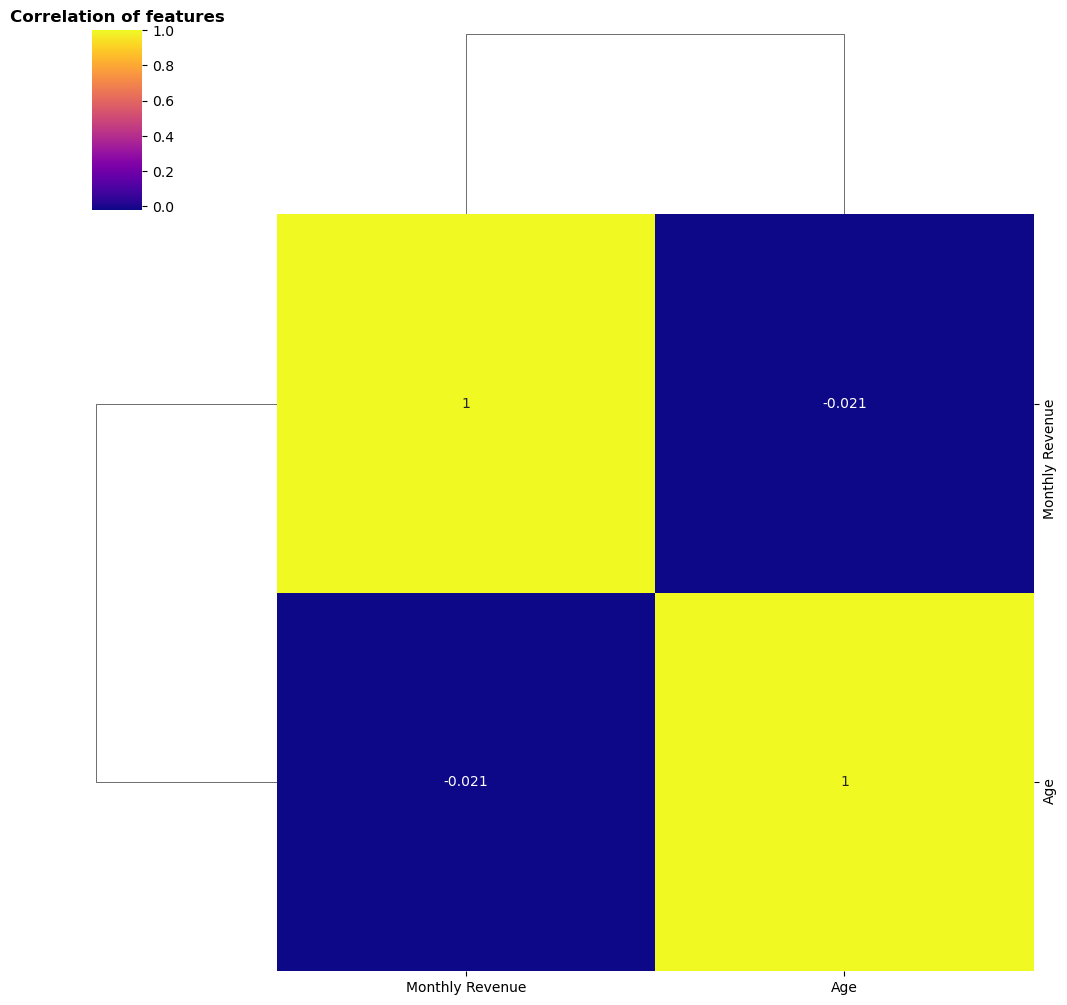

In [102]:
sns.clustermap(corel,cmap='plasma',annot=True)
plt.title('Correlation of features',weight='bold')
plt.show()

# Pairplot for numerical variables

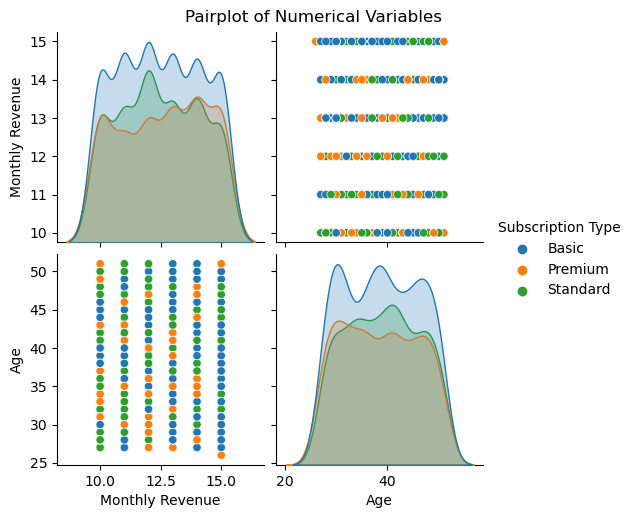

In [103]:
sns.pairplot(data, hue='Subscription Type', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Count of Different Gender

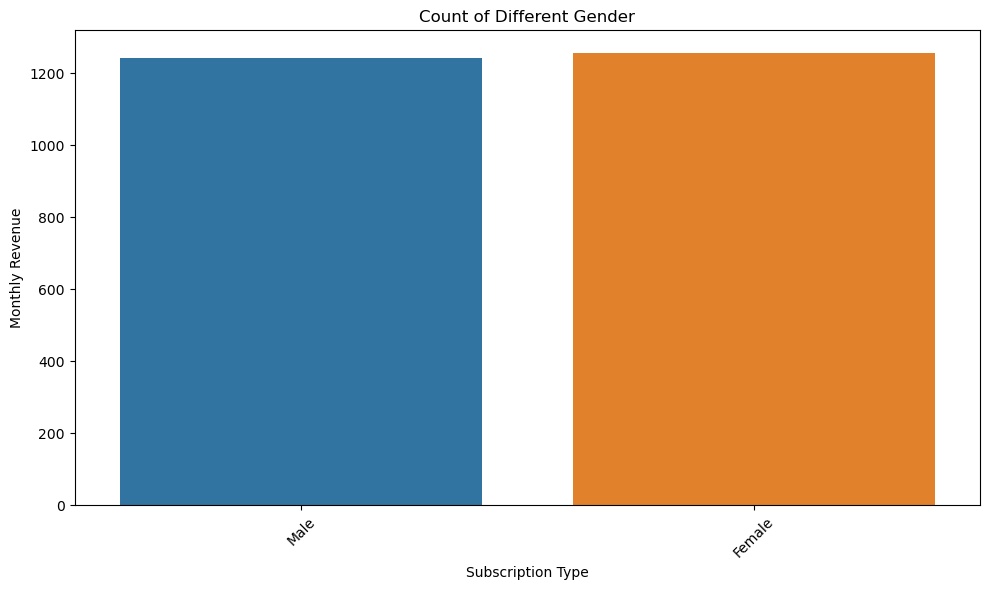

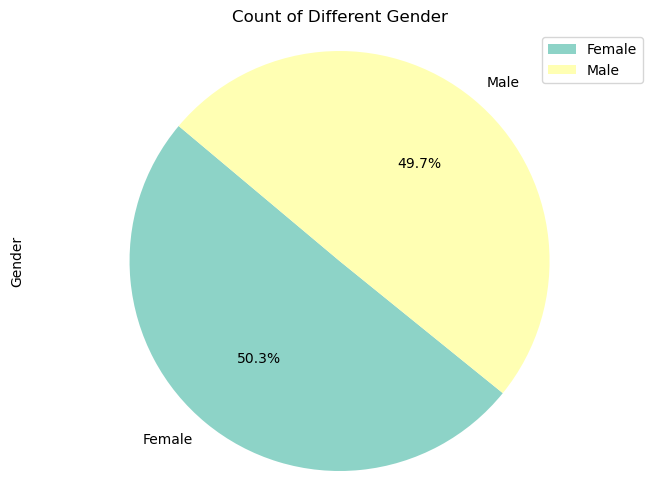

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data)
plt.title('Count of Different Gender')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Count of Different Gender')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

# Count of Different Device

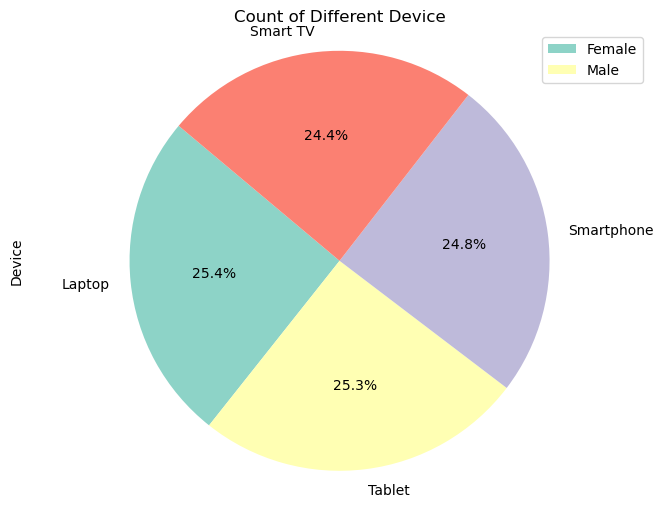

In [105]:
device_counts = data['Device'].value_counts()
plt.figure(figsize=(8, 6))
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Count of Different Device')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

# Age Group Distribution

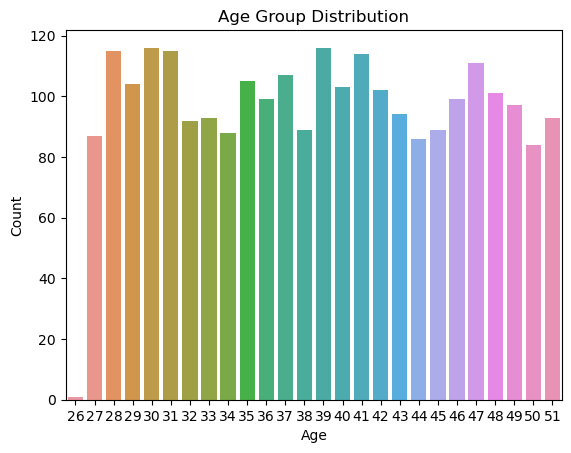

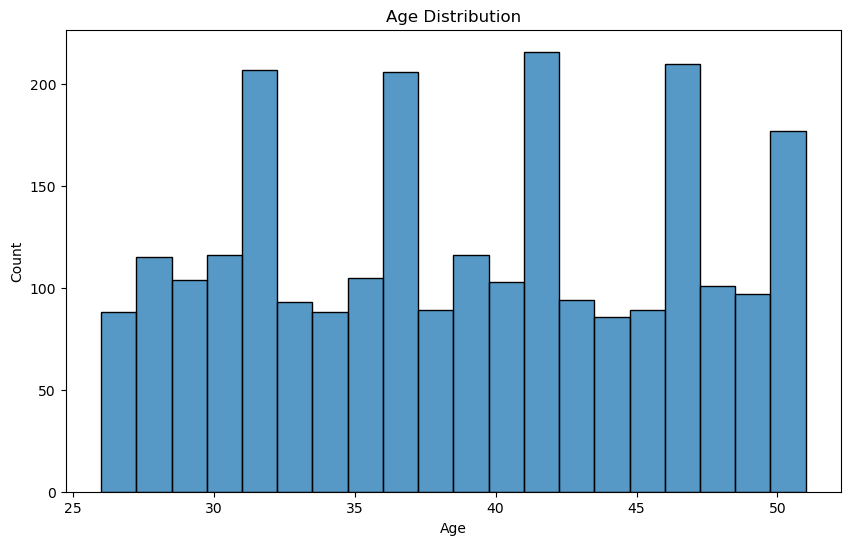

In [106]:
sns.countplot(x='Age', data=data)
plt.title('Age Group Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

# Distribution of Netflix Subscribers

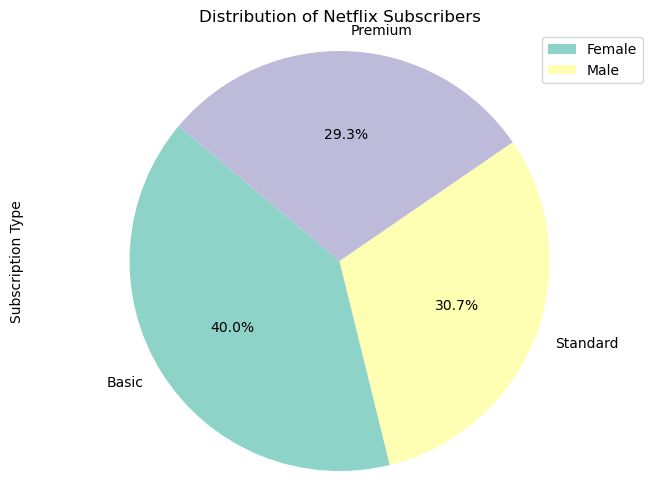

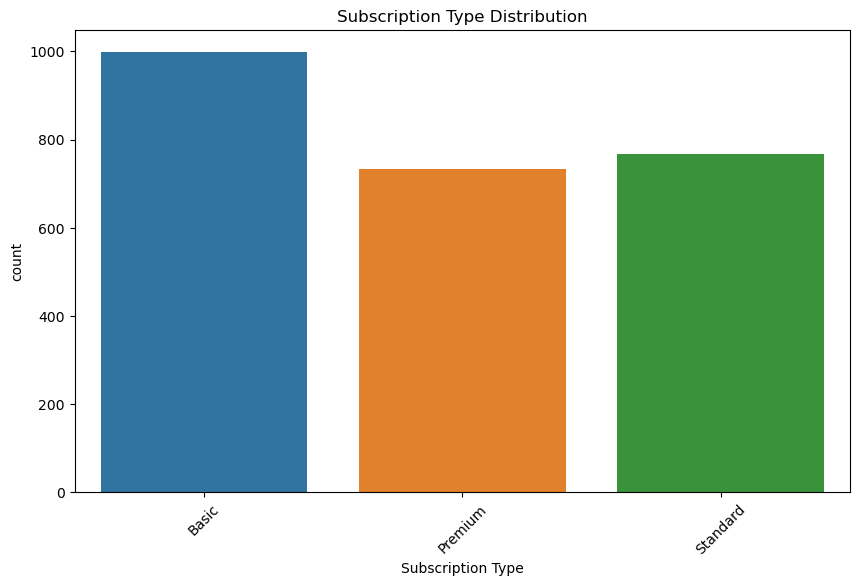

In [107]:
sub_counts = data['Subscription Type'].value_counts()
plt.figure(figsize=(8, 6))
sub_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Netflix Subscribers')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Subscription Type')
plt.title('Subscription Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Distribution of Monthly Revenue

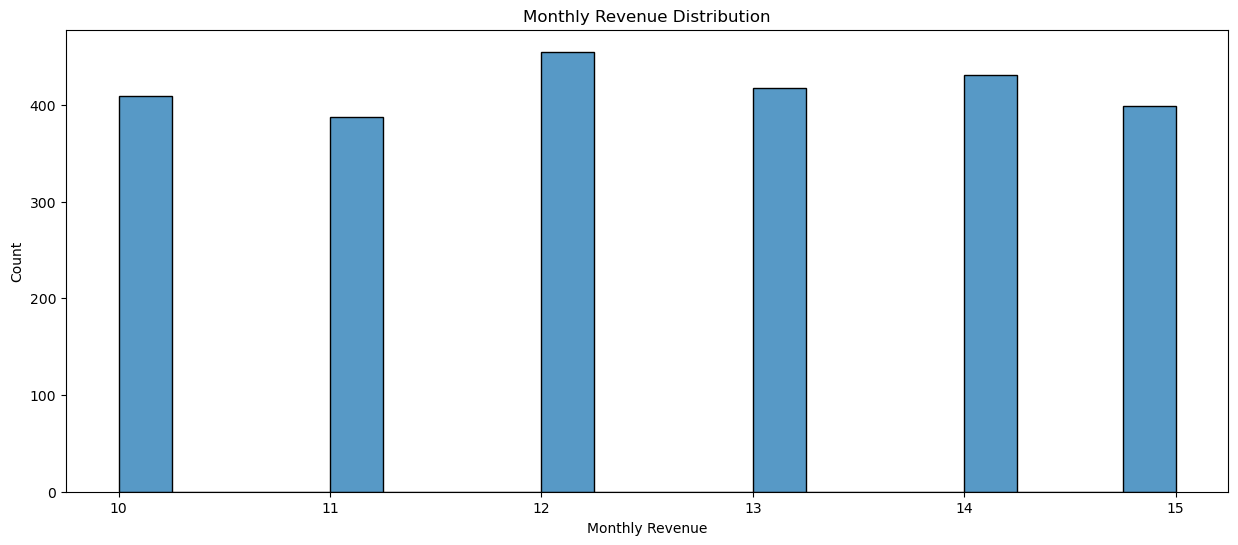

In [108]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='Monthly Revenue', bins=20)
plt.title('Monthly Revenue Distribution')
plt.show()

#  Box plot of Monthly Revenue by Subscription Type

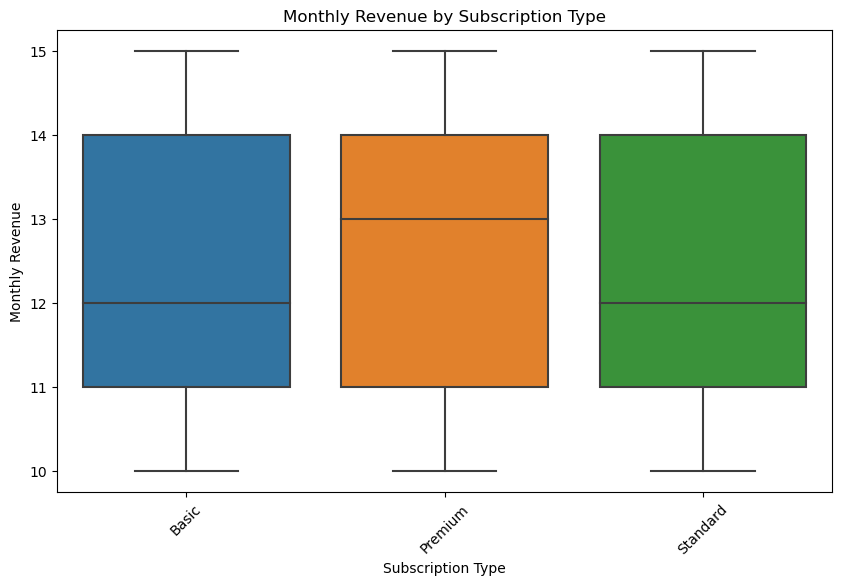

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Subscription Type', y='Monthly Revenue')
plt.title('Monthly Revenue by Subscription Type')
plt.xticks(rotation=45)
plt.show()

# Age distribution by Subscription Type

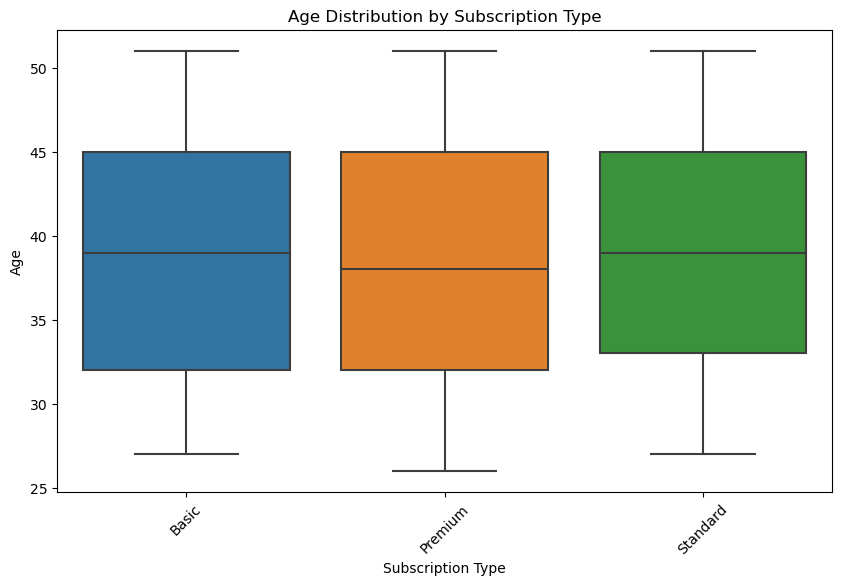

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Subscription Type', y='Age')
plt.title('Age Distribution by Subscription Type')
plt.xticks(rotation=45)
plt.show()

# Violin plot of Monthly Revenue by Gender

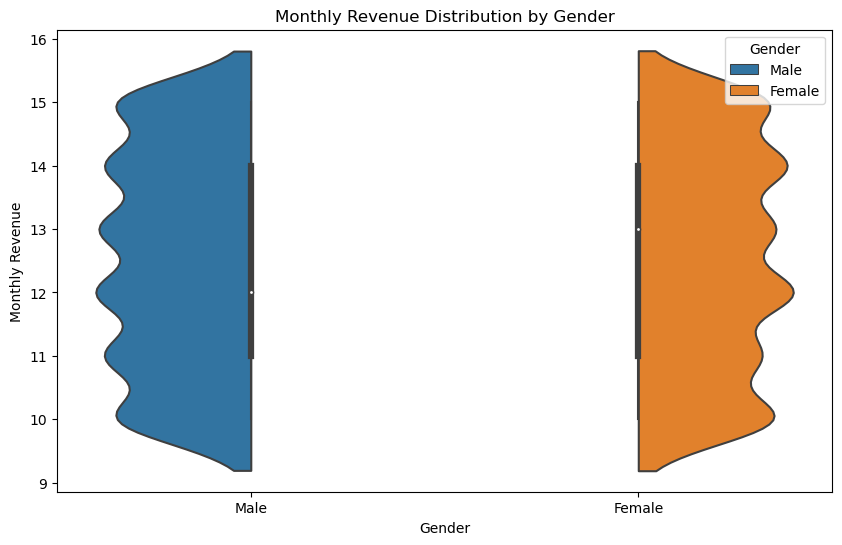

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Gender', y='Monthly Revenue', hue='Gender', split=True)
plt.title('Monthly Revenue Distribution by Gender')
plt.show()

# Count of subscriptions based on Plan Duration

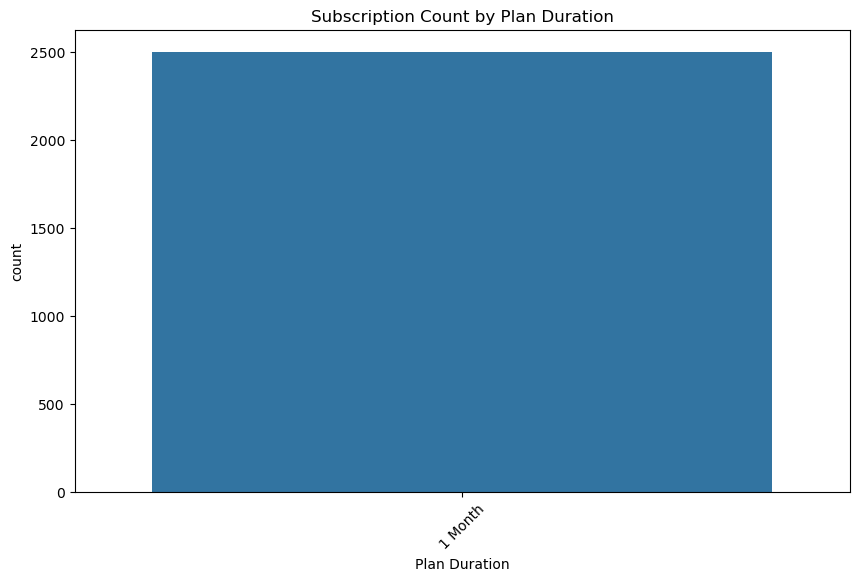

In [112]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Plan Duration')
plt.title('Subscription Count by Plan Duration')
plt.xticks(rotation=45)
plt.show()

# Distribution of Tenure

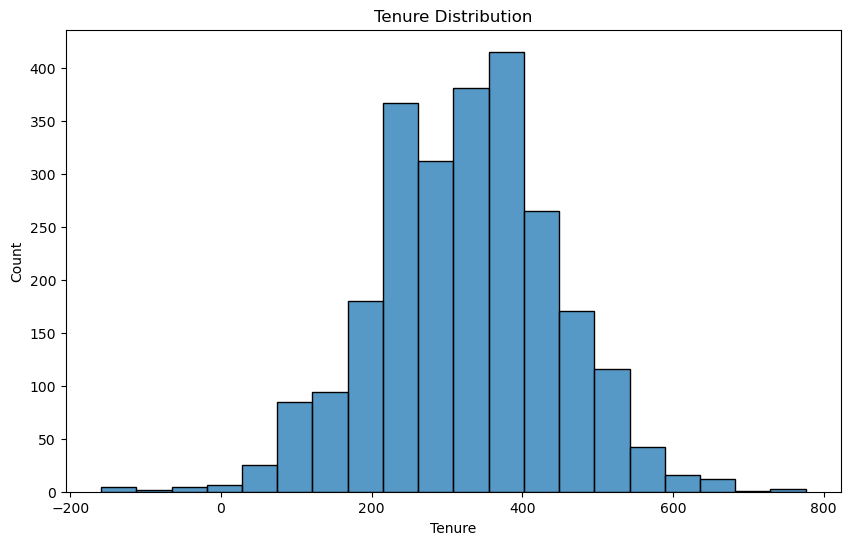

In [113]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

# Calculate the tenure (in days) since join date
data['Tenure'] = (data['Last Payment Date'] - data['Join Date']).dt.days

# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure', bins=20)
plt.title('Tenure Distribution')
plt.show()

# Distribution of Country

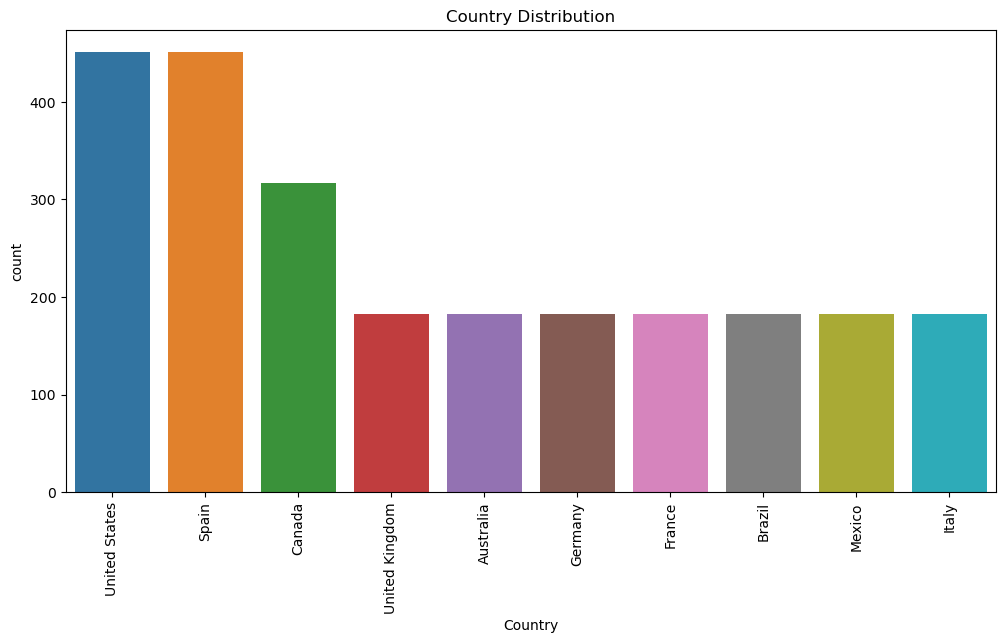

In [114]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Country', order=data['Country'].value_counts().index)
plt.title('Country Distribution')
plt.xticks(rotation=90)
plt.show()

# Box plot of Monthly Revenue by Country

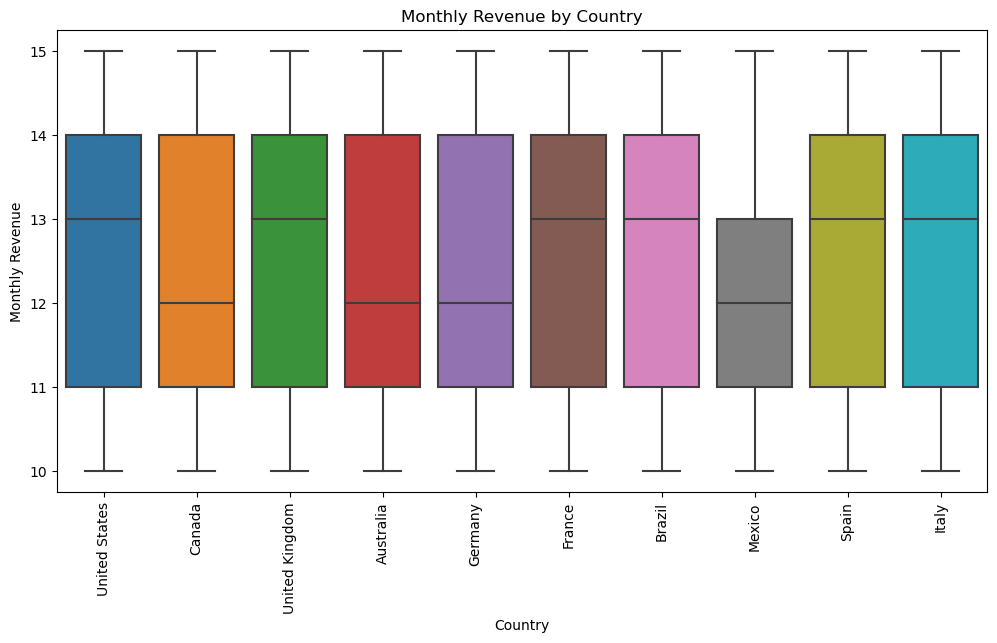

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country', y='Monthly Revenue')
plt.title('Monthly Revenue by Country')
plt.xticks(rotation=90)
plt.show()

#  Box plot of Age by Country

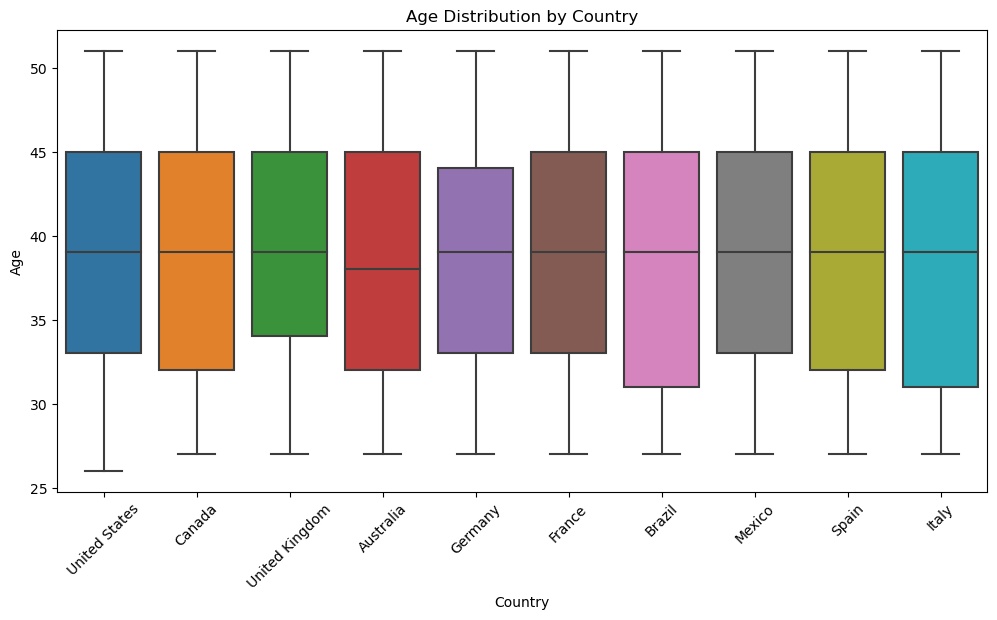

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Country', y='Age')
plt.title('Age Distribution by Country')
plt.xticks(rotation=45)
plt.show()